In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/archive (7)/predictive_maintenance.csv")

In [ ]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [ ]:
df.shape

(10000, 10)

In [ ]:
df.dtypes

,0
UDI,int64
Product ID,object
Type,object
Air temperature [K],float64
Process temperature [K],float64
Rotational speed [rpm],int64
Torque [Nm],float64
Tool wear [min],int64
Target,int64
Failure Type,object


In [ ]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
UDI,0
Product ID,0
Type,0
Air temperature [K],0
Process temperature [K],0
Rotational speed [rpm],0
Torque [Nm],0
Tool wear [min],0
Target,0
Failure Type,0


In [ ]:
df.isnull().sum()

,0
UDI,0
Product ID,0
Type,0
Air temperature [K],0
Process temperature [K],0
Rotational speed [rpm],0
Torque [Nm],0
Tool wear [min],0
Target,0
Failure Type,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [ ]:
# Descriptive statitics of data

df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [ ]:
# Extract data in numerical and categorical feature
Numerical_feat = [feature for feature in df.columns if df[feature].dtypes in ['int64' , 'float64']]

categorical_feat = [feature for feature in df.columns if df[feature].dtypes in ['object']]

In [ ]:
Numerical_feat

['UDI',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Target']

In [ ]:
categorical_feat

['Product ID', 'Type', 'Failure Type']

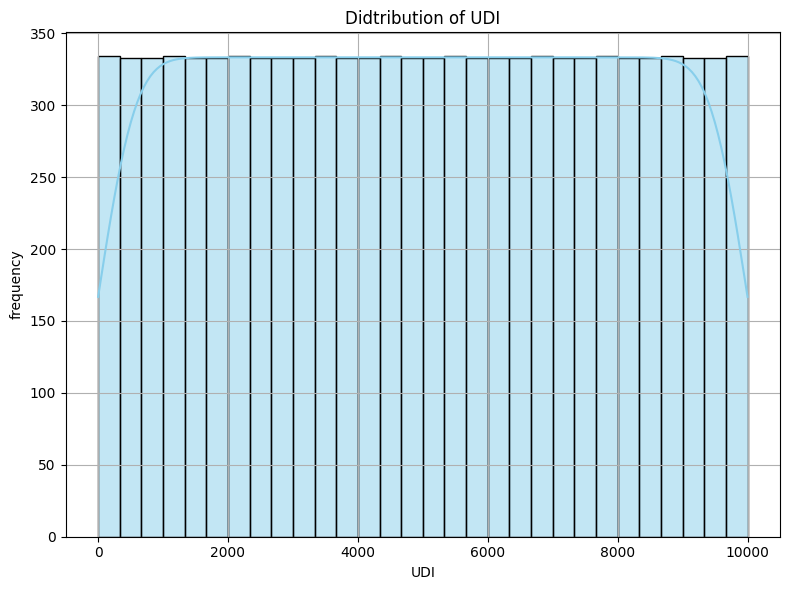

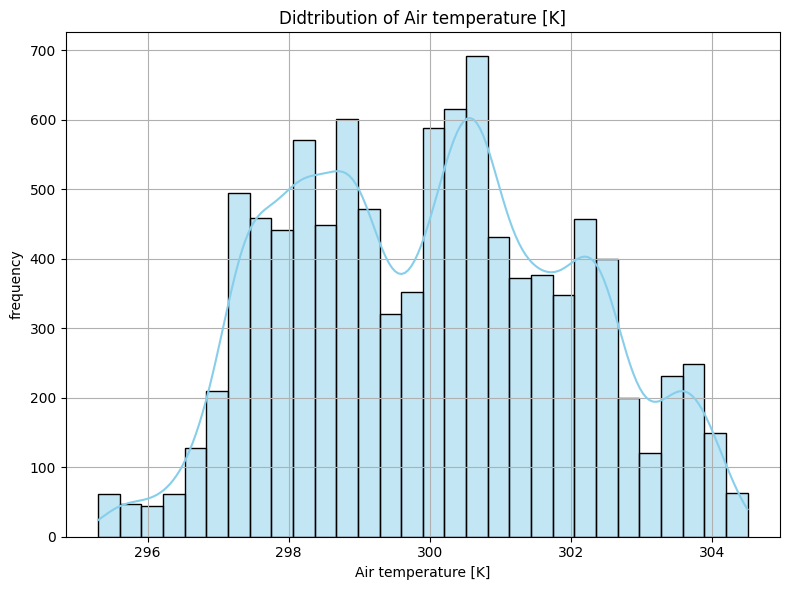

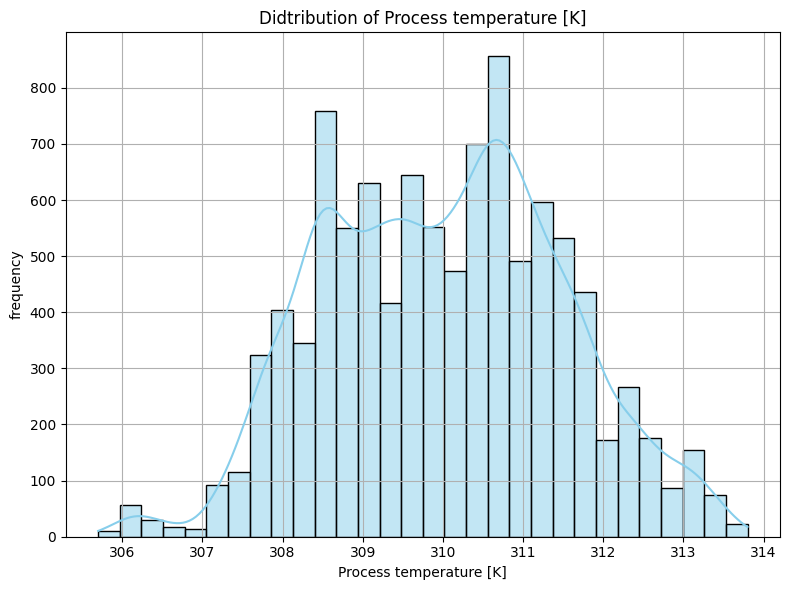

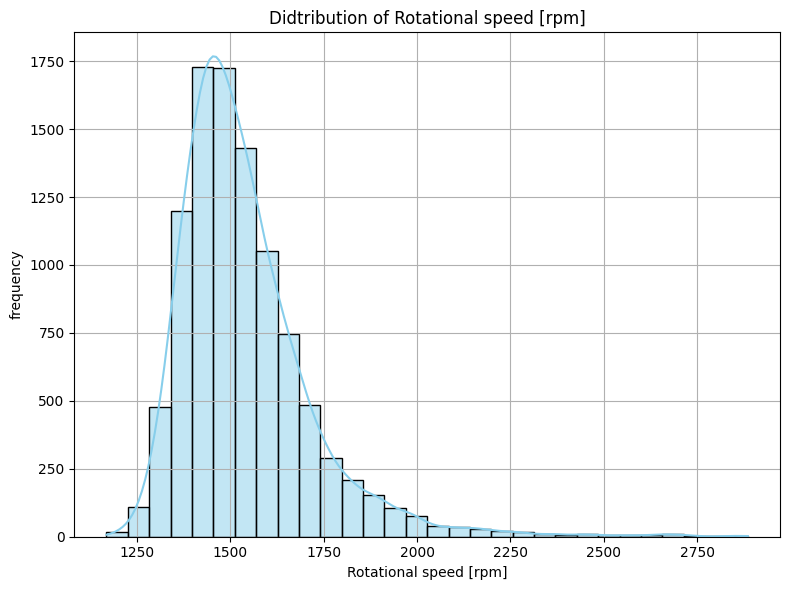

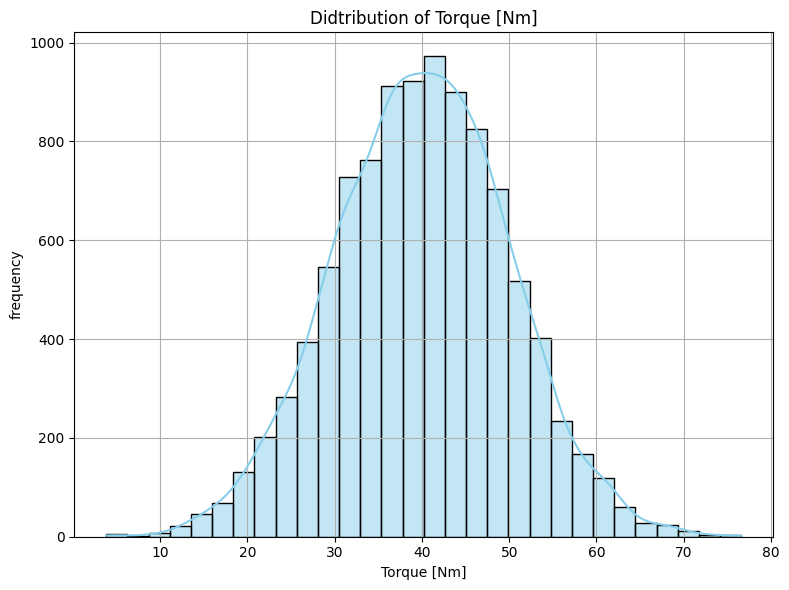

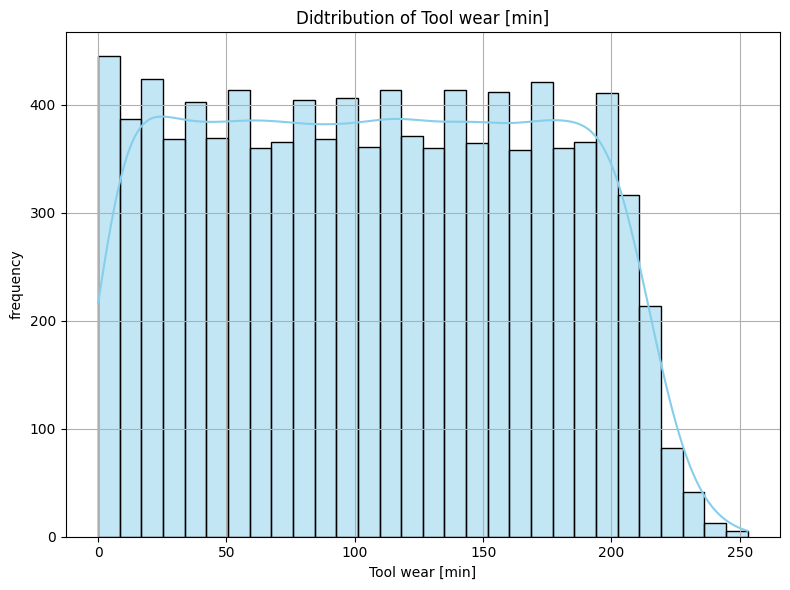

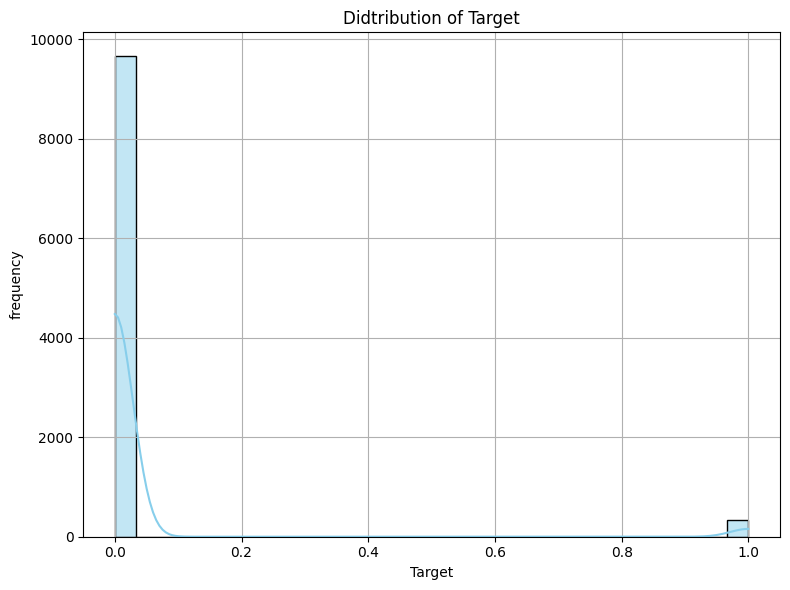

In [ ]:
# visualisation  of  numerical feature

for col in Numerical_feat:
  plt.figure(figsize = (8,6))
  sns.histplot(df[col], kde = True , bins = 30 , color ='skyblue' , edgecolor = 'black')
  plt.title(f"Didtribution of {col}")
  plt.xlabel(col)
  plt.ylabel('frequency')
  plt.grid(True)
  plt.tight_layout()
  plt.show()


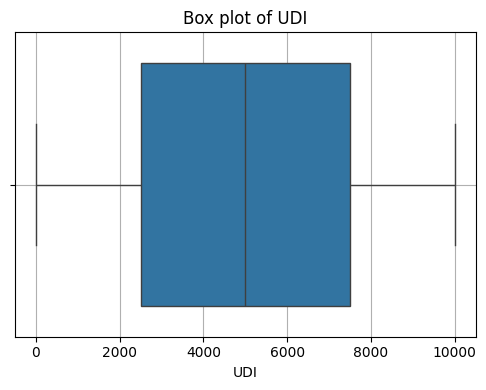

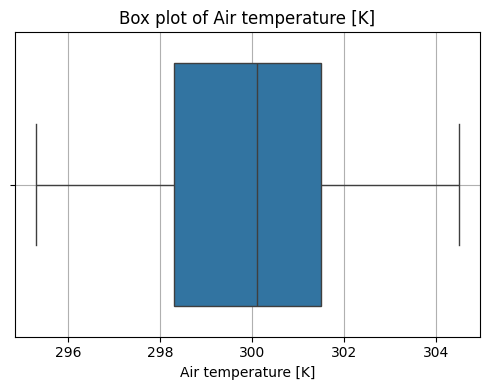

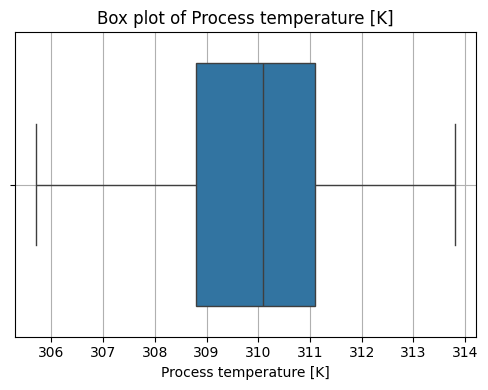

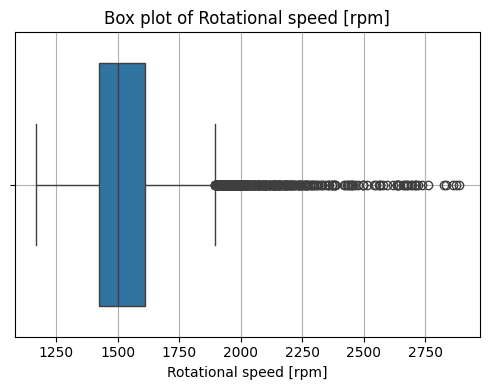

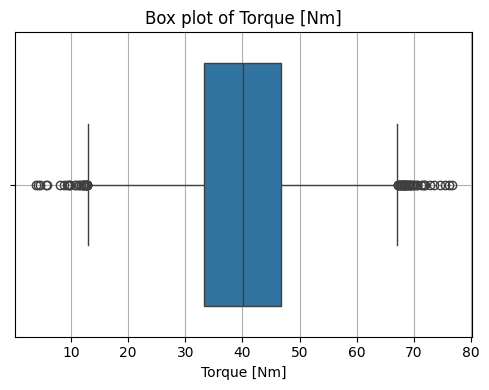

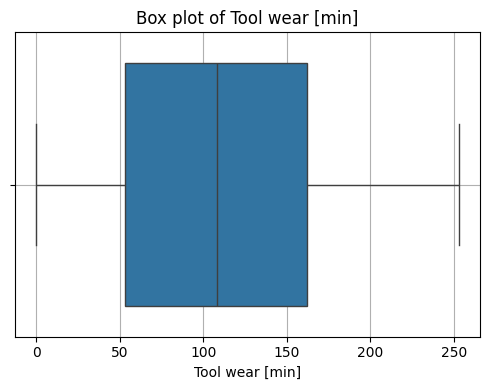

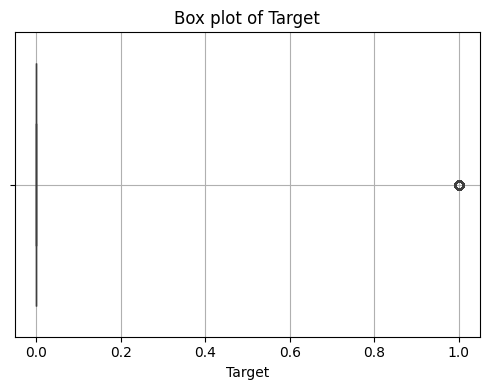

In [ ]:
# Box plot for the check the outliers

for col in Numerical_feat:
  plt.figure(figsize = (5,4))
  sns.boxplot(x = df[col])
  plt.title(f"Box plot of {col}")
  plt.xlabel(col)
  plt.grid(True)
  plt.tight_layout()
  plt.show()

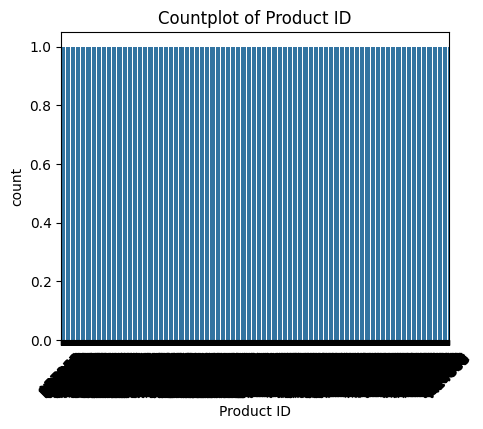

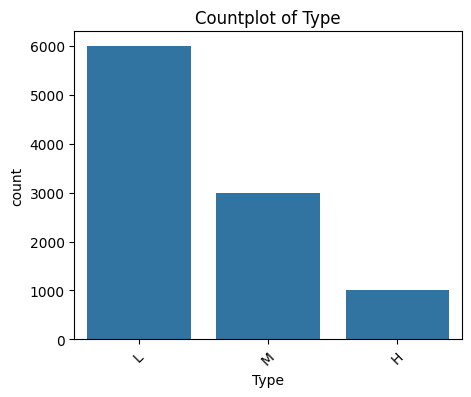

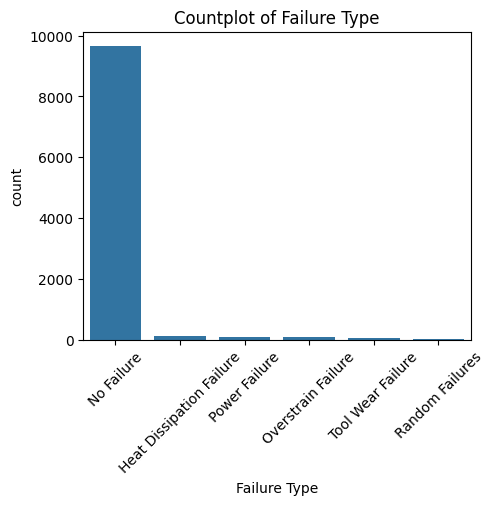

In [ ]:
# categorical feature visualisation

for col in categorical_feat:
  plt.figure(figsize = (5,4))
  sns.countplot(data=df, x=col, order=df[col].value_counts().index)
  plt.title(f"Countplot of {col}")
  plt.xticks(rotation=45)
  plt.show()

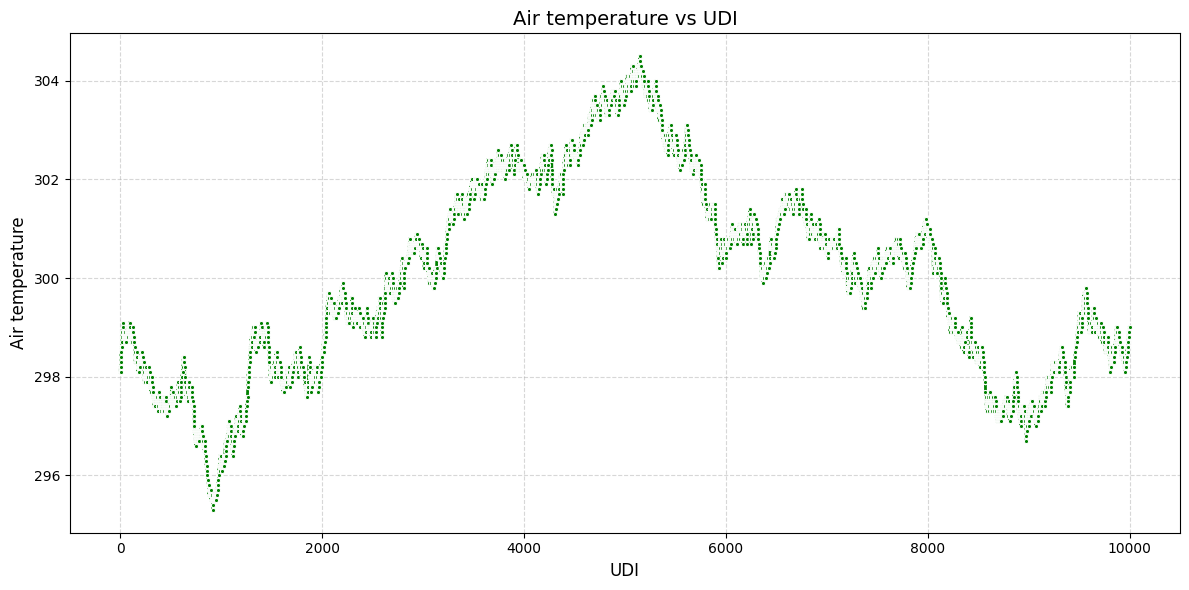

In [ ]:
# plot between UIDI and air temperature

plt.figure(figsize =(12,6))
sns.lineplot( x = 'UDI' , y = 'Air temperature [K]' , data = df , color = 'green' , linewidth = 2 , marker = 'o' , markersize = 3)

# adding label and title

plt.title('Air temperature vs UDI' , fontsize = 14)
plt.xlabel('UDI', fontsize = 12)
plt.ylabel('Air temperature' , fontsize = 12)
plt.grid(linestyle = '--' , alpha = 0.5)
plt.tight_layout()
plt.show()

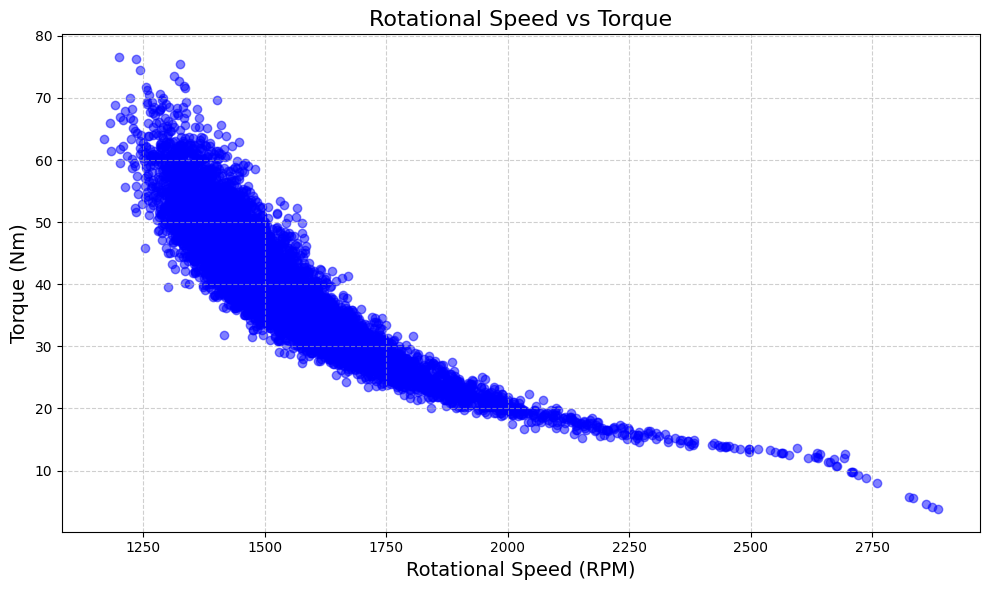

In [ ]:
# Rotational speed vs Torque

plt.figure(figsize=(10, 6))
plt.scatter(df["Rotational speed [rpm]"], df["Torque [Nm]"], color="blue", alpha=0.5)

# Labels and Title
plt.title("Rotational Speed vs Torque", fontsize=16)
plt.xlabel("Rotational Speed (RPM)", fontsize=14)
plt.ylabel("Torque (Nm)", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

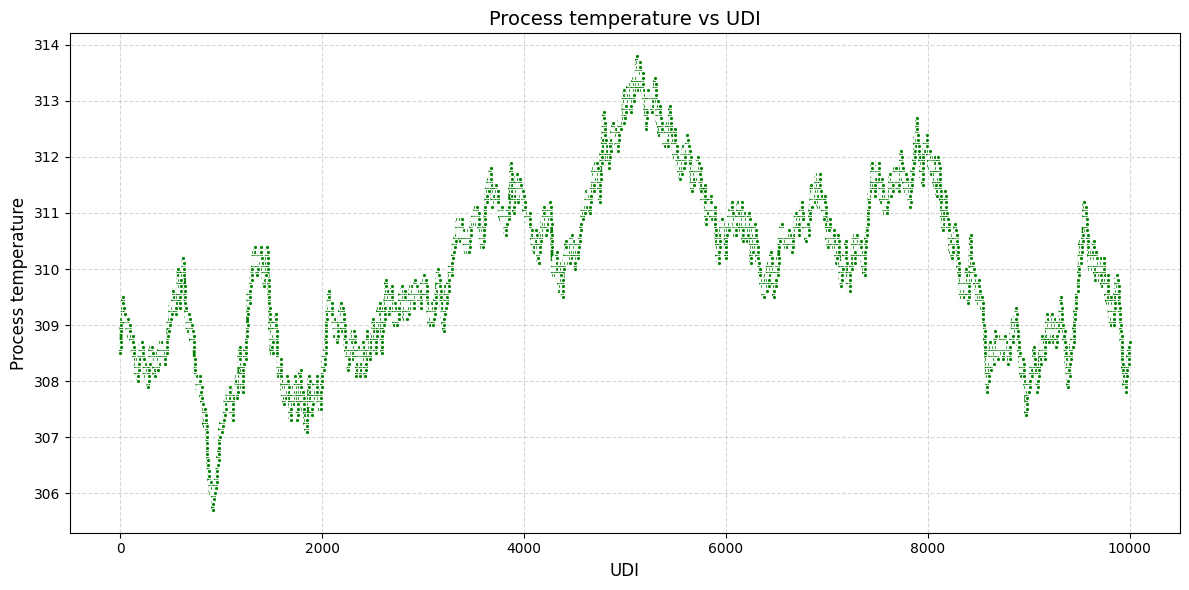

In [ ]:
# plot between UIDI and Process temperature [K]

plt.figure(figsize =(12,6))
sns.lineplot( x = 'UDI' , y = 'Process temperature [K]' , data = df , color = 'green' , linewidth = 2 , marker = 'o' , markersize = 3)

# adding data and tables

plt.title('Process temperature vs UDI' , fontsize = 14)
plt.xlabel('UDI', fontsize = 12)
plt.ylabel('Process temperature' , fontsize = 12)
plt.grid(linestyle = '--' , alpha = 0.5)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report




In [ ]:
# Drop unnecessary columns
df_clean = df.drop(["UDI", "Product ID"], axis=1)

# Encode categorical variables
label_encoders = {}
for col in ["Type", "Failure Type"]:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le

# Features & Target
X = df_clean.drop("Target", axis=1)
Y = df_clean["Target"]

In [ ]:
X

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,2,298.1,308.6,1551,42.8,0,1
1,1,298.2,308.7,1408,46.3,3,1
2,1,298.1,308.5,1498,49.4,5,1
3,1,298.2,308.6,1433,39.5,7,1
4,1,298.2,308.7,1408,40.0,9,1
...,...,...,...,...,...,...,...
9995,2,298.8,308.4,1604,29.5,14,1
9996,0,298.9,308.4,1632,31.8,17,1
9997,2,299.0,308.6,1645,33.4,22,1
9998,0,299.0,308.7,1408,48.5,25,1


In [ ]:
Y

,Target
0,0
1,0
2,0
3,0
4,0
...,...
9995,0
9996,0
9997,0
9998,0


In [ ]:
# train test split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y

    )

In [ ]:
# Model selection
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced"
)
rf_model.fit(X_train, Y_train)

# Predictions
y_pred = rf_model.predict(X_test)

In [ ]:
# Model Evaluations
print("✅ Model Evaluation Results")
print("-" * 40)
print("Accuracy:", accuracy_score(Y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, y_pred))
print("\nClassification Report:\n", classification_report(Y_test, y_pred))

✅ Model Evaluation Results
----------------------------------------
Accuracy: 0.9985

Confusion Matrix:
 [[1931    1]
 [   2   66]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1932
           1       0.99      0.97      0.98        68

    accuracy                           1.00      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       1.00      1.00      1.00      2000



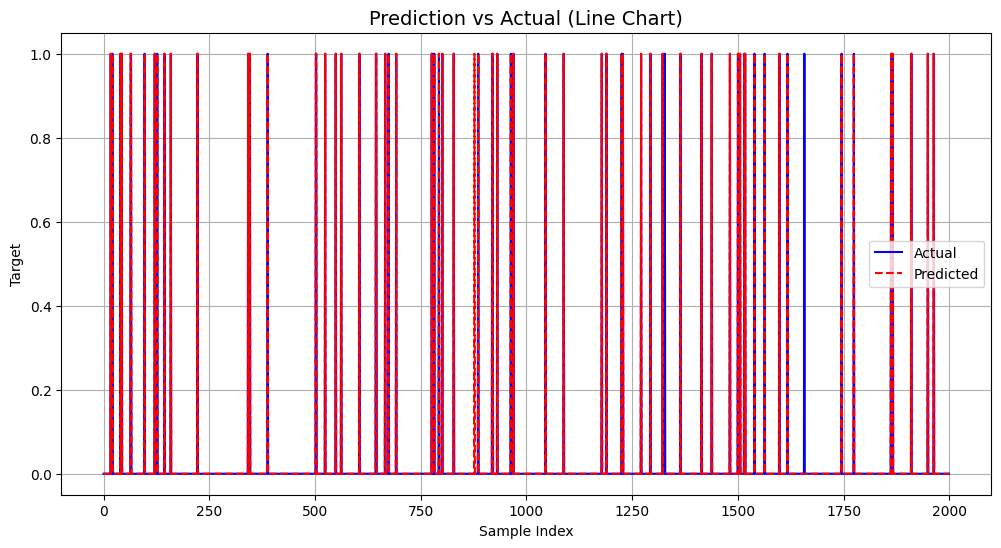

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(range(len(Y_test)), Y_test.values, label="Actual", color="blue", linestyle="-")
plt.plot(range(len(y_pred)), y_pred, label="Predicted", color="red", linestyle="--")
plt.title("Prediction vs Actual (Line Chart)", fontsize=14)
plt.xlabel("Sample Index")
plt.ylabel("Target")
plt.legend()
plt.grid()
plt.show()